In [1]:
from __future__ import print_function
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys
sys.path.append('/content/drive/My Drive/EVA4/updLib2/evaLibrary')
!ls '/content/drive/My Drive/EVA4/updLib2/evaLibrary'

Mounted at /content/drive
AlbTestTransforms.py   cyclicLR.py     K-MeansClusteringCalculation.xlsx
AlbTrainTransforms.py  DataLoaders.py  LR_Finder.py
albumentations.py      displayData.py  __pycache__
all.py		       execute.py      resNet.py
customNet.py	       Gradcam.py      rohan_library.py


In [26]:
import pandas as pd
df = pd.read_excel(r"/content/drive/My Drive/EVA4/updLib2/evaLibrary/K-MeansClusteringCalculation.xlsx")
df.columns
clusterData = pd.DataFrame(df, columns=["N  Width", "N Height"])

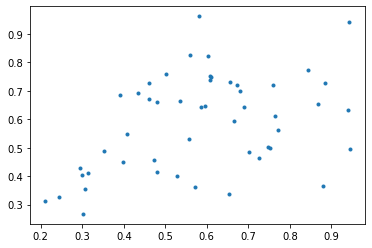

In [6]:
import matplotlib.pyplot as plt
plt.plot(clusterData["N  Width"],clusterData["N Height"],'.')

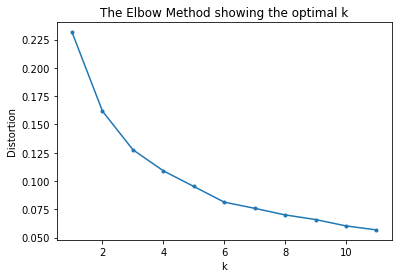

In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


# k means determine k
distortions = []
K = range(1,12)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(clusterData)
    kmeanModel.fit(clusterData)
    distortions.append(sum(np.min(cdist(clusterData, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) /clusterData.shape[0])


# Plot the elbow to find optimal k
plt.plot(K, distortions, '.-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('The Elbow Method ')
plt.show()

In [52]:
# (clusterData["N  Width"], clusterData["N Height"]
height = list(clusterData["N  Width"])
width = list(clusterData["N Height"])
ks = range(1,10)
meanIOU = []

for k in ks:
    cluster = KMeans(n_clusters=k)
    cluster.fit(clusterData)
    cx, cy, iou = [], [], []

    for i in range(50):
        l = cluster.labels_[i]
        cx.append(cluster.cluster_centers_[l][0])
        cy.append(cluster.cluster_centers_[l][1])
        hei, wid = height[i], width[i]
        iou.append(min(wid ,cx[i])* min(hei , cy[i])/(hei*wid+ cx[i]*cy[i]- min(wid , cx[i])* min(hei ,cy[i])))

    meanIOU.append(sum(iou)/50)

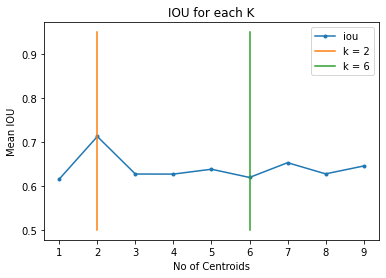

In [53]:
plt.plot(range(1,10), meanIOU,'.-',label = "iou")
plt.plot([2,2],[0.5,0.95],label = "k = 2")
plt.plot([6,6],[0.5,0.95],label = "k = 6")
plt.xlabel('No of Centroids')
plt.ylabel('Mean IOU')
plt.title('IOU for each K')
plt.legend()
plt.show()